<a href="https://colab.research.google.com/github/division-zero/Data-602assignments/blob/main/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The dataset contains the leading causes of death in the united states and in regions of the unitied states over time.  Despite the morbid topic, I thought it may be interesting to see how causes of death have shifted over time.  It may make for a comphrensive visual.  

https://catalog.data.gov/dataset/nchs-leading-causes-of-death-united-states

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

us_deaths_csv = "https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD"
#US causes of death imported
us_death_df = pd.read_csv(us_deaths_csv)
#view data
us_death_df.head()
us_death_df.describe()
print(us_death_df.isna().sum())


Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [53]:
#data looks relatively tidy. there are no NaN in this dataset
us_only_df=us_death_df[us_death_df['State']=='United States']#focusing on the US first
us_only_df.columns
us_simple_df=us_only_df[['Year','State', 'Cause Name','Deaths']] #removing the cause code and age adjusted death rate
us_simple_df.head()


,Year,State,Cause Name,Deaths
0,2017,United States,Unintentional injuries,169936
52,2017,United States,All causes,2813503
104,2017,United States,Alzheimer's disease,121404
156,2017,United States,Stroke,146383
208,2017,United States,CLRD,160201


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



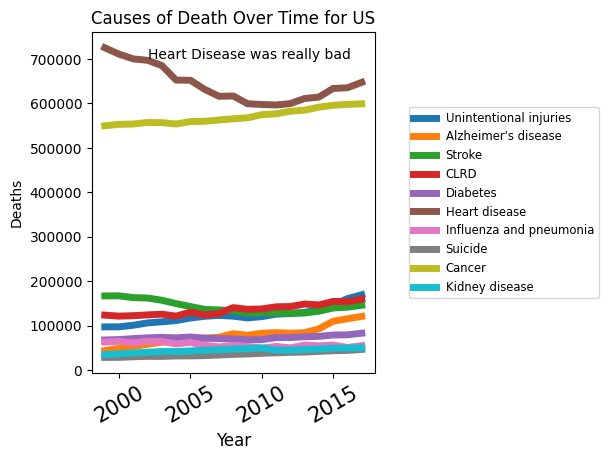

NameError: name 'total_deaths_by_cause' is not defined

In [71]:





# Plotting each cause of death over time except the total

for cause in us_simple_df['Cause Name'].unique(): #loop through each cause of death
  if cause != 'All causes': #do not plot the total deaths
    cause_data = us_simple_df[us_simple_df['Cause Name'] == cause] #set each cause of death to cause_data separately
    plt.plot(cause_data['Year'], cause_data['Deaths'], label=cause, linewidth = 5) #plot change line thickness to 5

# labels, title, and legend
plt.text(2002, 700000, "Heart Disease was really bad") #add text to the plot
plt.xlabel('Year', fontsize = 12) # add x axis label make font size 12
plt.ylabel('Deaths', fontsize = 10) #add y axis label make font size 10
plt.title('Causes of Death Over Time for US')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize = 'small') #move legend to middle right outside the bounds of the graph decrease the text size
plt.xticks(rotation=30, fontsize = 15) #rotate the x axis labels by 30 degrees increase the font size to 15
plt.tight_layout()
plt.show()

total_cause_deaths = us_simple_df.groupby('Cause Name')['Deaths'].sum().reset_index() #add the deaths over the years for each cause separately


total_cause_deaths = total_cause_deaths.sort_values(by='Deaths', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(total_cause_deaths['Cause Name'], total_cause_deaths['Deaths'], color='skyblue')
plt.xlabel('Total Deaths')
plt.ylabel('Cause of Death')
plt.title('Total Deaths by Cause in the United States')
plt.gca().invert_yaxis()  # Invert y-axis to show the largest bar at the top
plt.tight_layout()
plt.show()


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  